In [1]:
from sqlalchemy import create_engine
import os

In [2]:
usuario = "franco"
contraseña = "Proyectofinal2025!%"
host = "34.135.248.251"
puerto = "3306"
base_de_datos = "Heritage_BD"

In [3]:
# Crear conexión SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}:{puerto}/{base_de_datos}")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_sql_table("Sales", con=engine)

In [67]:
df1.head()

,SalesID,Store,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,ExciseTax,fecha_actualizacion,Description,Mes
2750951,2751661,1,44,18.99,18.99,2016-01-01,1750.0,1.84,2025-05-27 18:54:47,Christian Bros Brandy,2016-01
3670642,3671702,1,56,12.99,12.99,2016-01-01,1750.0,1.84,2025-05-27 18:54:47,Calico Jack Spiced Rum,2016-01
5543285,5544852,3,73,29.97,9.99,2016-01-01,750.0,0.34,2025-05-27 18:54:47,Sterling Vntrs Pnt Grigio,2016-01
3276963,3277896,1,51,25.99,25.99,2016-01-01,750.0,0.11,2025-05-27 18:54:47,Benton Lane Pnt Nr Ore,2016-01
2579951,2580644,2,41,53.98,26.99,2016-01-01,750.0,1.57,2025-05-27 18:54:47,Grand Marnier,2016-01


In [68]:
df1.isnull().sum()

SalesID                0
Store                  0
SalesQuantity          0
SalesDollars           0
SalesPrice             0
SalesDate              0
Volume                 0
ExciseTax              0
fecha_actualizacion    0
Description            0
Mes                    0
dtype: int64

In [69]:
df1.loc[df1['SalesDate'].isna()]

,SalesID,Store,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,ExciseTax,fecha_actualizacion,Description,Mes


In [70]:
df1 = df1.drop(df1[df1['Volume'] == 0].index)

In [71]:
df_clean = df1.dropna()

In [72]:
print(df1.isna().sum())

SalesID                0
Store                  0
SalesQuantity          0
SalesDollars           0
SalesPrice             0
SalesDate              0
Volume                 0
ExciseTax              0
fecha_actualizacion    0
Description            0
Mes                    0
dtype: int64


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6410736 entries, 2750951 to 908829
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   SalesID              int64         
 1   Store                int64         
 2   SalesQuantity        int64         
 3   SalesDollars         float64       
 4   SalesPrice           float64       
 5   SalesDate            datetime64[ns]
 6   Volume               float64       
 7   ExciseTax            float64       
 8   fecha_actualizacion  datetime64[ns]
 9   Description          object        
 10  Mes                  period[M]     
dtypes: datetime64[ns](2), float64(4), int64(3), object(1), period[M](1)
memory usage: 586.9+ MB


In [74]:
df1 = df1.sort_values('SalesDate')

In [75]:
X = df_clean[['Volume', 'ExciseTax']]
y = df_clean['SalesDollars']

In [82]:
# Crear una nueva columna para el mes
df1['Mes'] = df1['SalesDate'].dt.to_period('M')

# Agrupar por mes y sumar las ventas
ventas_mensuales = df1.groupby('Mes')['SalesDollars'].sum().reset_index()
ventas_mensuales['Mes'] = ventas_mensuales['Mes'].dt.to_timestamp()

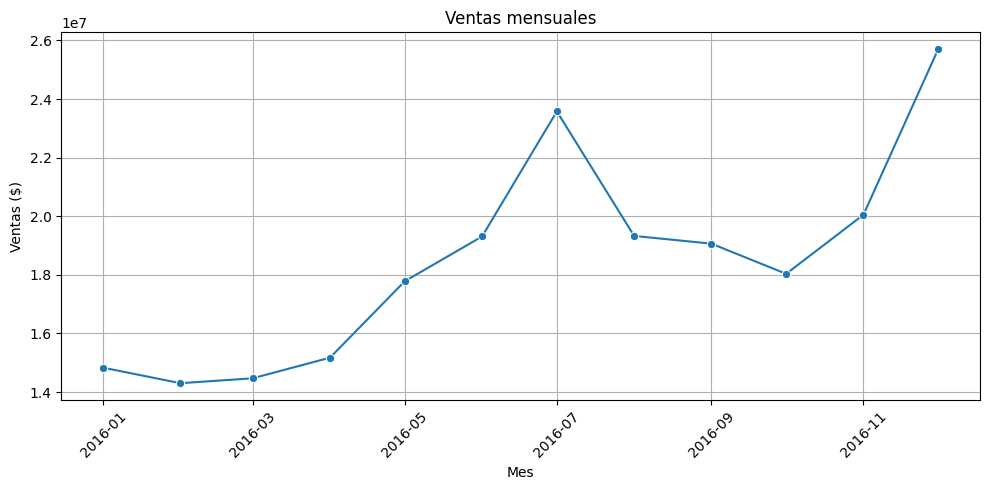

In [77]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Mes', y='SalesDollars', data=ventas_mensuales, marker='o')
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14:03:45 - cmdstanpy - INFO - Chain [1] start processing
14:03:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Franco\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


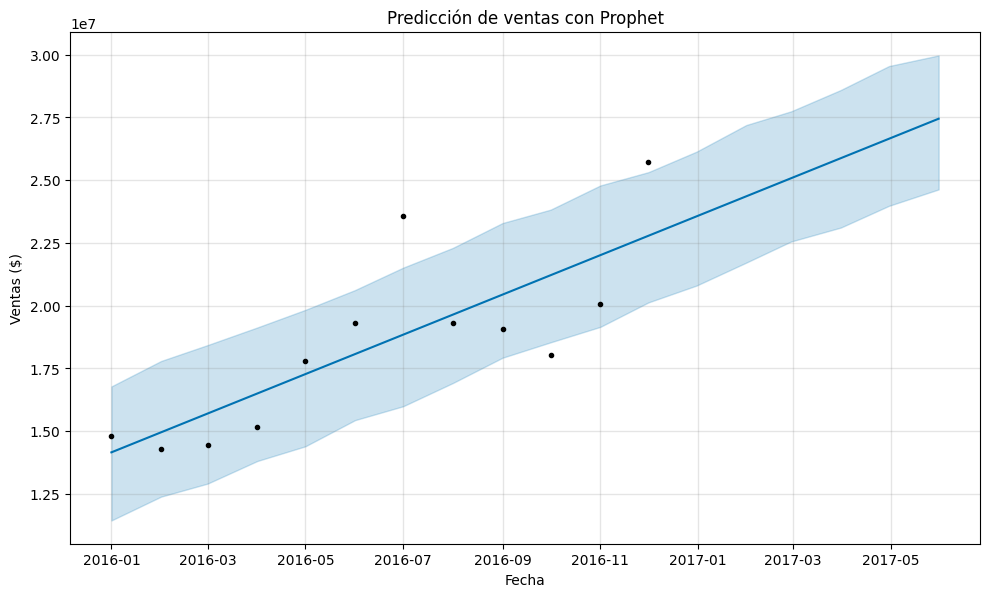

In [78]:
from prophet import Prophet

# Renombrar columnas para Prophet
df_prophet = ventas_mensuales.rename(columns={'Mes': 'ds', 'SalesDollars': 'y'})

# Crear y entrenar el modelo
model = Prophet()
model.fit(df_prophet)

# Crear futuro de 6 meses
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Visualizar la predicción
model.plot(forecast)
plt.title('Predicción de ventas con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.show()

14:03:46 - cmdstanpy - INFO - Chain [1] start processing
14:03:46 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Franco\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


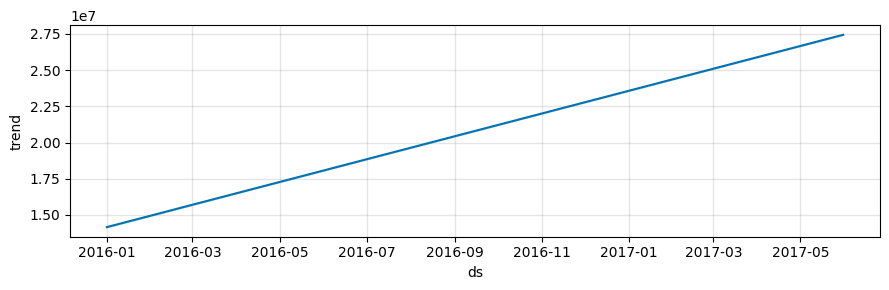

In [79]:
# Renombrar columnas si es necesario
ventas_mensuales = ventas_mensuales.rename(columns={'Mes': 'ds', 'SalesDollars': 'y'})

# Crear y ajustar el modelo
model = Prophet()
model.fit(ventas_mensuales)

# Hacer la predicción
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Graficar componentes
model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [80]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
print(forecast.columns)
print(ventas_mensuales.columns)

AttributeError: 'PredictionResults' object has no attribute 'columns'

In [87]:
# Preparación
df_prophet = df1[['SalesDate', 'SalesDollars']].copy()
df_prophet.rename(columns={'SalesDate': 'ds', 'SalesDollars': 'y'}, inplace=True)

# Entrenamiento
model = Prophet()
model.fit(df_prophet)

# Crear futuro y predecir
future = model.make_future_dataframe(periods=12, freq='M')  # o 'D'
forecast = model.predict(future)

# Ahora sí:
print(forecast.columns)  # Esto debería funcionar

14:09:17 - cmdstanpy - INFO - Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] done processing
14:09:58 - cmdstanpy - ERROR - Chain [1] error: error during processing No such process
Optimization terminated abnormally. Falling back to Newton.


KeyboardInterrupt: 

In [ ]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 5.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 5.8 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 5.8 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 5.7 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/41.0 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/41.0 MB 5.8 MB/s eta 0:00:07
   --- ----------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurar que el índice es la fecha
ventas_mensuales.set_index('Mes', inplace=True)

# Crear y entrenar el modelo SARIMA (puede ajustarse)
model = SARIMAX(ventas_mensuales['SalesDollars'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Predicción
forecast = results.get_forecast(steps=6)
pred_ci = forecast.conf_int()

# Gráfico
ax = ventas_mensuales['SalesDollars'].plot(label='observado', figsize=(12, 6))
forecast.predicted_mean.plot(ax=ax, label='Predicción')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('Predicción de ventas con SARIMA')
plt.show()

KeyError: "None of ['Mes'] are in the columns"